In [1]:
import numpy as np
import pandas as pd

import os

import tensorflow as tf

from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, SpatialDropout2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Training Data and Labels
dim_x = 28
dim_y = 28
batch_size = 32

In [3]:
x_train = pd.read_csv('D:/Academics Canada/AIDI/Semester 2/Capstone 2/Project/MNIST Dataset/sign_mnist_train.csv')
y_train = np.array(x_train['label'])
x_train.drop('label', axis = 1, inplace = True)
x_train = np.array(x_train.values)

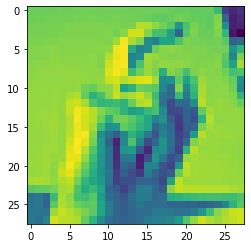

In [4]:
plt.imshow(x_train[27454].reshape(28, 28))

In [5]:
x_train[0]

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
       165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
       170, 169, 111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160,
       163, 164, 170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172,
       172, 171, 171, 170, 113, 123, 131, 137, 142, 145, 150, 152, 155,
       158, 161, 163, 164, 172, 105, 142, 170, 171, 171, 171, 172, 172,
       173, 173, 172, 171, 171, 171, 116, 125, 133, 139, 143, 146, 151,
       153, 156, 159, 162, 163, 167, 167,  95, 144, 171, 172, 172, 172,
       172, 172, 173, 173, 173, 172, 172, 171, 117, 126, 134, 140, 145,
       149, 153, 156, 158, 161, 163, 164, 175, 156,  87, 154, 172, 173,
       173, 173, 173, 173, 174, 174, 174, 173, 172, 172, 119, 128, 136,
       142, 146, 150, 153, 156, 159, 163, 165, 164, 184, 148,  89, 164,
       172, 174, 174, 174, 174, 175, 175, 174, 175, 174, 173, 173, 122,
       130, 138, 143, 147, 150, 154, 158, 162, 165, 166, 172, 18

In [6]:
print('Data shapes', x_train.shape, y_train.shape, 'classes: ', len(np.unique(y_train)))

Data shapes (27455, 784) (27455,) classes:  24


In [7]:
classes = len(np.unique(y_train))
x_train = x_train.reshape((-1, dim_x, dim_y, 1))
print(np.unique(y_train))

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [8]:
y = np.zeros((np.shape(y_train)[0], len(np.unique(y_train))))

In [9]:
y_train[y_train>8] = y_train[y_train > 8] - 1

for ii in range(len(y_train)):
    y[ii, y_train[ii]] = 1
y_train = y

In [10]:
no_validation = int(0.1 * (x_train.shape[0]))

x_val = x_train[0:no_validation,...]
y_val = y_train[0:no_validation,...]

x_train = x_train[0:no_validation,...]
y_train = y_train[0:no_validation,...]

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(2745, 28, 28, 1) (2745, 24) (2745, 28, 28, 1) (2745, 24)


In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 10, width_shift_range = 0.05, height_shift_range = 0.05, shear_range = 0.1, zoom_range = 0.075)
train_generator = train_datagen.flow(x = x_train, y = y_train, batch_size = batch_size, shuffle = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = test_datagen.flow(x = x_val, y = y_val, batch_size = batch_size, shuffle = True)

In [12]:
# Directory where the checkpoints will be saved
checkpoint_dir = 'D:/Academics Canada/AIDI/Semester 2/Capstone 2/Model'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "mnist_chkpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [13]:
model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5, 5), strides = 1, input_shape = (dim_x, dim_y, 1), activation = tf.nn.tanh))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 16, kernel_size = (5, 5), strides = 1, activation = tf.nn.tanh))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(120, activation = tf.nn.tanh))
model.add(Dense(84, activation = tf.nn.tanh))
model.add(Dense(classes, activation = tf.nn.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam( lr=1e-4), metrics = ['accuracy'])

In [15]:
#Donot train again if you have model saved

In [16]:
steps_per_epoch = int(len(y_train) / batch_size)
max_epochs = 500
history = model.fit_generator(generator = train_generator, steps_per_epoch = steps_per_epoch, 
                              validation_data = val_generator, validation_steps = 50, epochs = max_epochs, 
                              verbose = 1, callbacks = [checkpoint_callback])

W0403 10:15:08.998341 28480 deprecation.py:323] From <ipython-input-16-e08708f34371>:5: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
W0403 10:15:09.055188 28480 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0403 10:15:09.137002 28480 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 85 steps, validate for 50 steps
Epoch 1/500
85/85 [==============================] - 4s 42ms/step - loss: 3.1762 - accuracy: 0.0490 - val_loss: 3.1418 - val_accuracy: 0.0613
Epoch 2/500
85/85 [==============================] - 2s 25ms/step - loss: 3.1278 - accuracy: 0.0988 - val_loss: 3.0945 - val_accuracy: 0.1500
Epoch 3/500
85/85 [==============================] - 3s 32ms/step - loss: 3.0731 - accuracy: 0.1393 - val_loss: 3.0181 - val_accuracy: 0.1606u
Epoch 4/500
85/85 [==============================] - 2s 26ms/step - loss: 2.9770 - accuracy: 0.1496 - val_loss: 2.8866 - val_accuracy: 0.1838
Epoch 5/500
85/85 [==============================] - 2s 24ms/step - loss: 2.8305 - accuracy: 0.1898 - val_loss: 2.7160 - val_accuracy: 0.2406
Epoch 6/500
85/85 [==============================] - 5s 56ms/step - loss: 2.6622 - accuracy: 0.2433 - val_loss: 2.5378 - val_accuracy: 0.2750
Epoch 7/500
85/85 [==============================] - 4s 42ms/step - loss: 2.5156 - accuracy: 0.2787 - val

Epoch 58/500
85/85 [==============================] - 4s 48ms/step - loss: 0.9232 - accuracy: 0.7210 - val_loss: 0.6741 - val_accuracy: 0.8425
Epoch 59/500
85/85 [==============================] - 3s 40ms/step - loss: 0.9065 - accuracy: 0.7328 - val_loss: 0.6788 - val_accuracy: 0.8275
Epoch 60/500
85/85 [==============================] - 4s 45ms/step - loss: 0.8794 - accuracy: 0.7412 - val_loss: 0.6559 - val_accuracy: 0.8413
Epoch 61/500
85/85 [==============================] - 4s 45ms/step - loss: 0.8819 - accuracy: 0.7387 - val_loss: 0.6410 - val_accuracy: 0.8494
Epoch 62/500
85/85 [==============================] - 4s 52ms/step - loss: 0.8727 - accuracy: 0.7475 - val_loss: 0.6291 - val_accuracy: 0.8425
Epoch 63/500
85/85 [==============================] - 4s 48ms/step - loss: 0.8384 - accuracy: 0.7505 - val_loss: 0.6247 - val_accuracy: 0.8394
Epoch 64/500
85/85 [==============================] - 5s 62ms/step - loss: 0.8340 - accuracy: 0.7659 - val_loss: 0.6041 - val_accuracy: 0.8587

85/85 [==============================] - 4s 49ms/step - loss: 0.4546 - accuracy: 0.8769 - val_loss: 0.2648 - val_accuracy: 0.9494
Epoch 116/500
85/85 [==============================] - 5s 62ms/step - loss: 0.4442 - accuracy: 0.8828 - val_loss: 0.2773 - val_accuracy: 0.9394
Epoch 117/500
85/85 [==============================] - 4s 51ms/step - loss: 0.4242 - accuracy: 0.8887 - val_loss: 0.2576 - val_accuracy: 0.9506
Epoch 118/500
85/85 [==============================] - 4s 49ms/step - loss: 0.4502 - accuracy: 0.8747 - val_loss: 0.2518 - val_accuracy: 0.9519
Epoch 119/500
85/85 [==============================] - 5s 57ms/step - loss: 0.4170 - accuracy: 0.8913 - val_loss: 0.2676 - val_accuracy: 0.9425
Epoch 120/500
85/85 [==============================] - 4s 45ms/step - loss: 0.4185 - accuracy: 0.8824 - val_loss: 0.2526 - val_accuracy: 0.9525
Epoch 121/500
85/85 [==============================] - 5s 57ms/step - loss: 0.4175 - accuracy: 0.8891 - val_loss: 0.2464 - val_accuracy: 0.9569
Epoch 

Epoch 172/500
85/85 [==============================] - 4s 41ms/step - loss: 0.2453 - accuracy: 0.9407 - val_loss: 0.1094 - val_accuracy: 0.9912
Epoch 173/500
85/85 [==============================] - 4s 46ms/step - loss: 0.2283 - accuracy: 0.9473 - val_loss: 0.1075 - val_accuracy: 0.9919
Epoch 174/500
85/85 [==============================] - 5s 55ms/step - loss: 0.2373 - accuracy: 0.9447 - val_loss: 0.1080 - val_accuracy: 0.9906
Epoch 175/500
85/85 [==============================] - 3s 38ms/step - loss: 0.2309 - accuracy: 0.9477 - val_loss: 0.1143 - val_accuracy: 0.9881
Epoch 176/500
85/85 [==============================] - 4s 49ms/step - loss: 0.2338 - accuracy: 0.9458 - val_loss: 0.1030 - val_accuracy: 0.9919
Epoch 177/500
85/85 [==============================] - 4s 42ms/step - loss: 0.2200 - accuracy: 0.9466 - val_loss: 0.1004 - val_accuracy: 0.9919 1s
Epoch 178/500
85/85 [==============================] - 3s 38ms/step - loss: 0.2236 - accuracy: 0.9477 - val_loss: 0.1008 - val_accura

Epoch 229/500
85/85 [==============================] - 3s 40ms/step - loss: 0.1363 - accuracy: 0.9698 - val_loss: 0.0525 - val_accuracy: 0.9987
Epoch 230/500
85/85 [==============================] - 3s 39ms/step - loss: 0.1356 - accuracy: 0.9683 - val_loss: 0.0508 - val_accuracy: 0.9969
Epoch 231/500
85/85 [==============================] - 3s 38ms/step - loss: 0.1370 - accuracy: 0.9716 - val_loss: 0.0491 - val_accuracy: 0.9981
Epoch 232/500
85/85 [==============================] - 3s 33ms/step - loss: 0.1295 - accuracy: 0.9742 - val_loss: 0.0444 - val_accuracy: 0.9987
Epoch 233/500
85/85 [==============================] - 3s 30ms/step - loss: 0.1256 - accuracy: 0.9738 - val_loss: 0.0443 - val_accuracy: 0.9981
Epoch 234/500
85/85 [==============================] - 3s 32ms/step - loss: 0.1247 - accuracy: 0.9768 - val_loss: 0.0453 - val_accuracy: 0.9981
Epoch 235/500
85/85 [==============================] - 3s 40ms/step - loss: 0.1282 - accuracy: 0.9735 - val_loss: 0.0420 - val_accuracy:

Epoch 286/500
85/85 [==============================] - 3s 35ms/step - loss: 0.0821 - accuracy: 0.9823 - val_loss: 0.0249 - val_accuracy: 0.9994
Epoch 287/500
85/85 [==============================] - 3s 32ms/step - loss: 0.0748 - accuracy: 0.9864 - val_loss: 0.0207 - val_accuracy: 0.9994
Epoch 288/500
85/85 [==============================] - 3s 37ms/step - loss: 0.0833 - accuracy: 0.9834 - val_loss: 0.0229 - val_accuracy: 0.9994
Epoch 289/500
85/85 [==============================] - 2s 28ms/step - loss: 0.0799 - accuracy: 0.9819 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 290/500
85/85 [==============================] - 2s 28ms/step - loss: 0.0713 - accuracy: 0.9860 - val_loss: 0.0197 - val_accuracy: 0.9994
Epoch 291/500
85/85 [==============================] - 4s 43ms/step - loss: 0.0766 - accuracy: 0.9864 - val_loss: 0.0261 - val_accuracy: 0.9981
Epoch 292/500
85/85 [==============================] - 4s 44ms/step - loss: 0.0831 - accuracy: 0.9830 - val_loss: 0.0216 - val_accuracy:

85/85 [==============================] - 4s 49ms/step - loss: 0.0535 - accuracy: 0.9915 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 343/500
85/85 [==============================] - 3s 32ms/step - loss: 0.0462 - accuracy: 0.9941 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 344/500
85/85 [==============================] - 3s 35ms/step - loss: 0.0537 - accuracy: 0.9919 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 345/500
85/85 [==============================] - 3s 36ms/step - loss: 0.0517 - accuracy: 0.9893 - val_loss: 0.0121 - val_accuracy: 0.9994
Epoch 346/500
85/85 [==============================] - 3s 32ms/step - loss: 0.0503 - accuracy: 0.9915 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 347/500
85/85 [==============================] - 3s 41ms/step - loss: 0.0516 - accuracy: 0.9897 - val_loss: 0.0139 - val_accuracy: 0.9994
Epoch 348/500
85/85 [==============================] - 3s 30ms/step - loss: 0.0513 - accuracy: 0.9919 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 

Epoch 399/500
85/85 [==============================] - 3s 36ms/step - loss: 0.0347 - accuracy: 0.9926 - val_loss: 0.0119 - val_accuracy: 0.9987
Epoch 400/500
85/85 [==============================] - 3s 39ms/step - loss: 0.0354 - accuracy: 0.9952 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 401/500
85/85 [==============================] - 3s 30ms/step - loss: 0.0351 - accuracy: 0.9937 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 402/500
85/85 [==============================] - 4s 42ms/step - loss: 0.0306 - accuracy: 0.9948 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 403/500
85/85 [==============================] - 4s 48ms/step - loss: 0.0320 - accuracy: 0.9952 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 404/500
85/85 [==============================] - 3s 32ms/step - loss: 0.0309 - accuracy: 0.9963 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 405/500
85/85 [==============================] - 4s 41ms/step - loss: 0.0338 - accuracy: 0.9948 - val_loss: 0.0070 - val_accuracy:

Epoch 456/500
85/85 [==============================] - 4s 52ms/step - loss: 0.0204 - accuracy: 0.9982 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 457/500
85/85 [==============================] - 4s 52ms/step - loss: 0.0243 - accuracy: 0.9945 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 458/500
85/85 [==============================] - 4s 46ms/step - loss: 0.0221 - accuracy: 0.9974 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 459/500
85/85 [==============================] - 4s 46ms/step - loss: 0.0220 - accuracy: 0.9963 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 460/500
85/85 [==============================] - 3s 38ms/step - loss: 0.0268 - accuracy: 0.9959 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 461/500
85/85 [==============================] - 3s 40ms/step - loss: 0.0229 - accuracy: 0.9967 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 462/500
85/85 [==============================] - 3s 31ms/step - loss: 0.0221 - accuracy: 0.9967 - val_loss: 0.0043 - val_accuracy:

In [17]:
model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5, 5), strides = 1, input_shape = (dim_x, dim_y, 1), activation = tf.nn.tanh))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 16, kernel_size = (5, 5), strides = 1, activation = tf.nn.tanh))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(120, activation = tf.nn.tanh))
model.add(Dense(84, activation = tf.nn.tanh))
model.add(Dense(classes, activation = tf.nn.softmax))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [18]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

In [19]:
image_0  = x_train[0]
image_0 = image_0.reshape((1,dim_x, dim_y, 1))

In [20]:
image_0.shape

(1, 28, 28, 1)

In [21]:
z = model.predict(image_0)

In [22]:
len(z[0])

24

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [24]:
y_train.shape

(2745, 24)

In [25]:
alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']

In [26]:
import numpy as np
max_index = np.argmax(z[0])

In [27]:
final_label = alphabets[max_index]

Predicted alphabet:  f


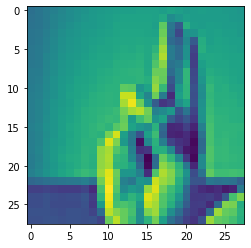

In [38]:
print('Predicted alphabet: ', final_label)
plt.imshow(x_train[2000].reshape(28, 28))

Predicted alphabet:  l


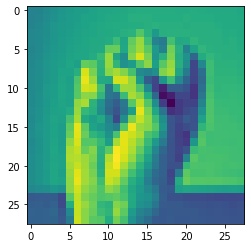

In [40]:
image = 10
image_0  = x_train[image]
image_0 = image_0.reshape((1, 28, 28, 1))
z = model.predict(image_0)
alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']
max_index = np.argmax(z[0])
final_label = alphabets[max_index]

print('Predicted alphabet: ', final_label)
plt.imshow(x_train[image].reshape(28, 28))

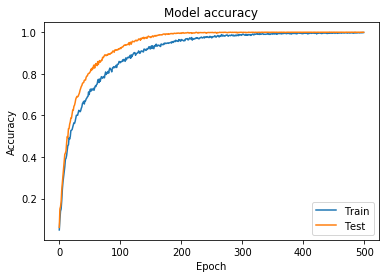

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()


In [30]:
history.history['val_accuracy'][len(history.history['val_accuracy'])-1]*100

100.0

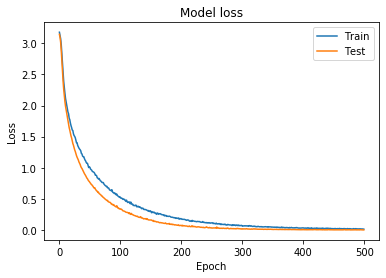

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()